In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/flower.csv')

In [ ]:
df.head()

,Unnamed: 0,feature 1,feature 2,label
0,0,1.204442,3.576114,0
1,1,0.158710,-1.482171,0
2,2,0.095247,-1.279955,0
3,3,0.349178,-2.064380,0
4,4,0.694150,2.889109,0


In [ ]:
X = df[['feature 1','feature 2']].values
y = df['label'].values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


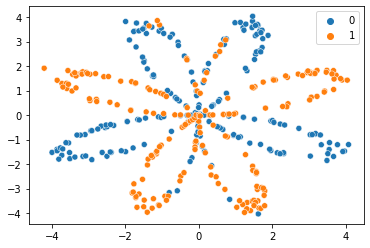

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue = y)

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5)

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='SGD',loss='binary_crossentropy')

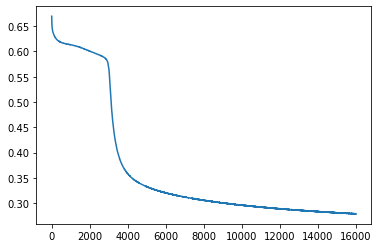

In [ ]:
model.fit(X_train_scaled,y_train,epochs=16000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-4.5, 4.5)

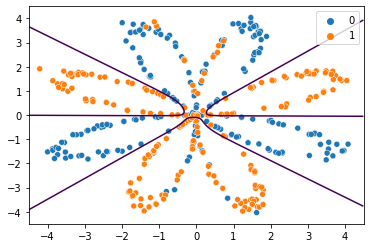

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = -4.5, 4.5, 0.01
yl, yr, dy = -4.5, 4.5, 0.01
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r)) 
p_grid_scaled = scaler.transform(p_grid)
f_grid = model.predict(p_grid_scaled)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])
plt.xlim(xl,xr)
plt.ylim(xl,xr)

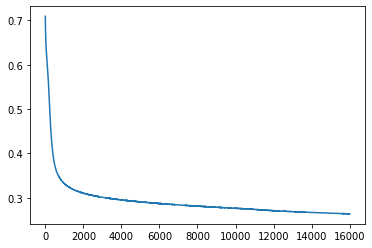

In [ ]:
model = Sequential()
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop',loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=16000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-4.5, 4.5)

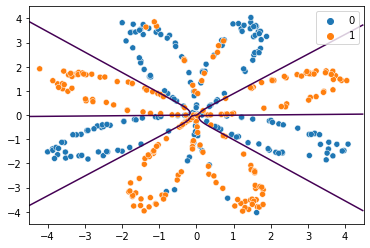

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = -4.5, 4.5, 0.01
yl, yr, dy = -4.5, 4.5, 0.01
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r)) 
p_grid_scaled = scaler.transform(p_grid)
f_grid = model.predict(p_grid_scaled)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])
plt.xlim(xl,xr)
plt.ylim(xl,xr)